In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils as utils
from tqdm import tqdm

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [7]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train = np.array(train)
print(train.shape)

(42000, 785)


In [26]:
# init X, y from training data
X = train[:, 1:]
y = train[:, 0]

(42000,)


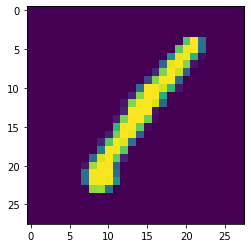

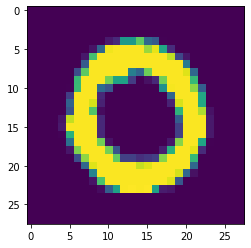

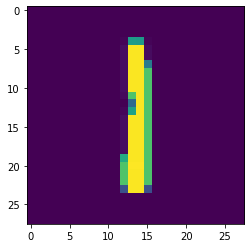

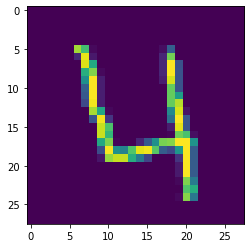

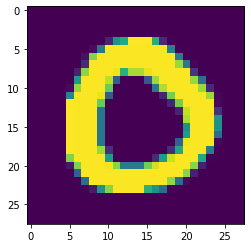

In [21]:
# display images
for i in range(5):
    plt.imshow(X[i].reshape(28, 28))
    plt.show()

In [38]:
# convert to pytorch tensor from numpy
X_tensor = torch.from_numpy(X)
X_tensor = X_tensor.float()
y_tensor = torch.from_numpy(y)

# split data into training/validation
training_X = X_tensor[:33600]
training_y = y_tensor[:33600]

validation_X = X_tensor[:8400]
validation_y = y_tensor[:8400]

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(784, 50, True)
        self.layer2 = nn.Linear(50, 20, True)
        self.layer3 = nn.Linear(20, 10, True)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.layer3(x)
        return x
    


        
        


In [50]:
my_nn = Net()
result = my_nn(training_X)
# print(result.shape)

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(my_nn.parameters())

epochs = 1000
training_losses = []
validation_losses = []

for i in tqdm(range(epochs)):
    my_nn.zero_grad()
    loss = criterion(my_nn(training_X), training_y)
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())
    with torch.no_grad():
        my_nn.zero_grad()
        loss = criterion(my_nn(validation_X), validation_y)
        validation_losses.append(loss.item())
    

# print(criterion(result, training_y))

100%|██████████| 1000/1000 [01:59<00:00,  8.38it/s]


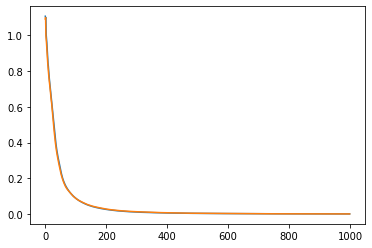

In [53]:
x_axis = []
for i in range(epochs):
    x_axis.append(i)
plt.plot(x_axis, training_losses)
plt.plot(x_axis, validation_losses)